In [27]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [28]:
def read_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type='variation.txt', window_size=100):
    res = {}
    res[algo] = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir, type)    
                with open(full_path, 'r') as f:
                    for line in f:
                        num_str = re.match(r'\(srcIP = +(\d+\.\d+\.\d+\.\d+)\) +(.+)', line).group(2)
                        num_list = [int(num) for num in num_str.split()]
                        # print(num_list)
                        res[algo].append(num_list)
            
    return res

read_data()

{'cm': [[0,
   5,
   265,
   20,
   1,
   154,
   407,
   12,
   9,
   10,
   4,
   8,
   2,
   20,
   427,
   6,
   2,
   58,
   12,
   9,
   290,
   13,
   518,
   379,
   7,
   63,
   48,
   73,
   37,
   35,
   29,
   7,
   163,
   71,
   993,
   1166,
   37,
   156,
   7,
   19,
   95,
   5,
   53,
   64,
   84,
   567,
   99,
   4,
   9,
   144,
   84,
   251,
   328,
   208,
   108,
   188,
   462,
   423,
   6115,
   3822,
   220,
   164,
   278,
   947,
   628,
   421,
   976,
   98,
   560,
   216,
   343,
   656,
   2012,
   1130,
   222,
   273,
   227,
   234,
   47,
   188,
   31,
   173,
   143,
   207,
   1049,
   2561,
   206,
   281,
   62,
   84,
   127,
   58,
   65,
   117,
   287,
   600,
   95,
   140,
   97,
   161,
   94],
  [0,
   1078,
   451,
   624,
   357,
   504,
   317,
   463,
   415,
   530,
   619,
   661,
   694,
   757,
   633,
   481,
   611,
   399,
   813,
   389,
   540,
   365,
   544,
   643,
   654,
   388,
   416,
   639,
   473,
   463,
   

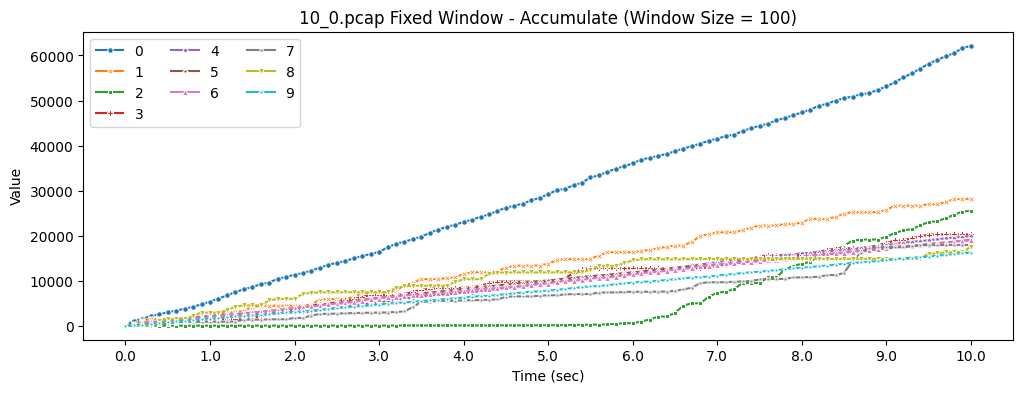

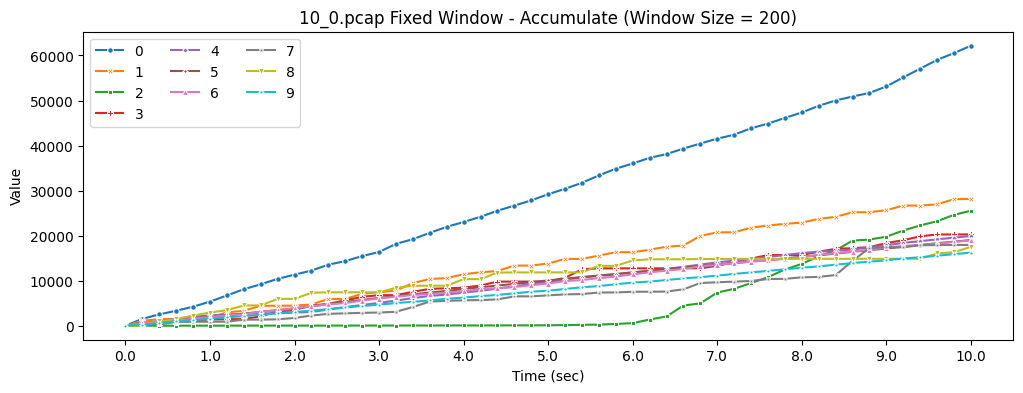

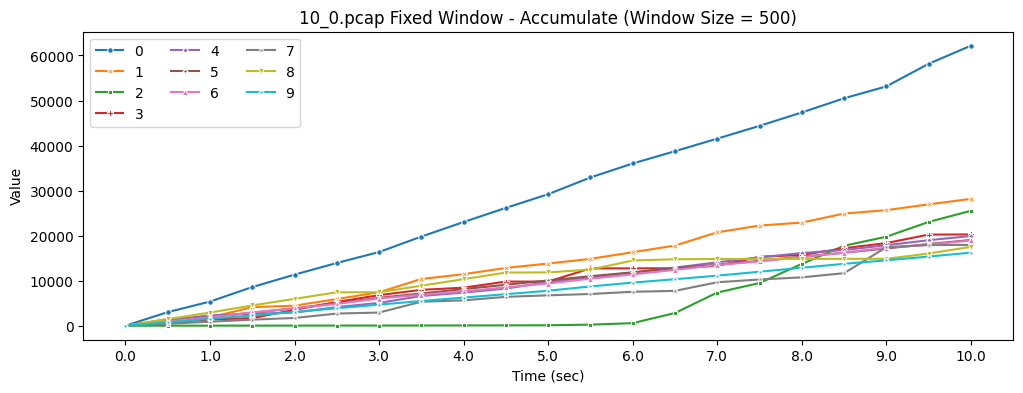

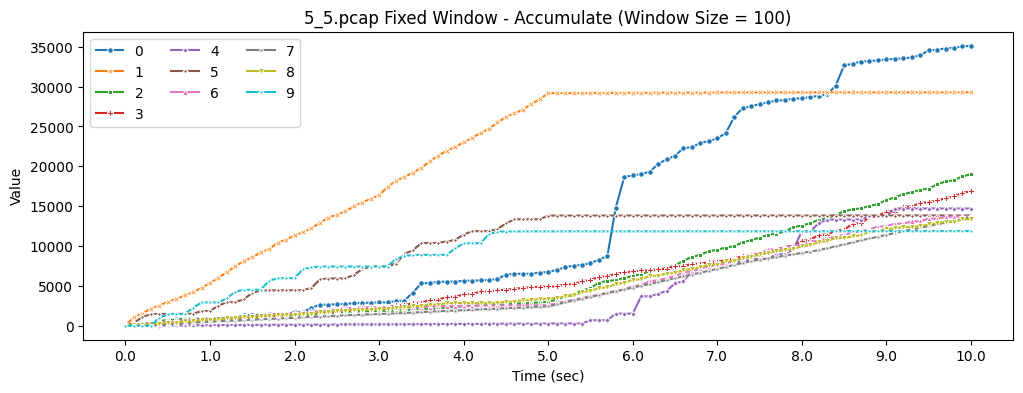

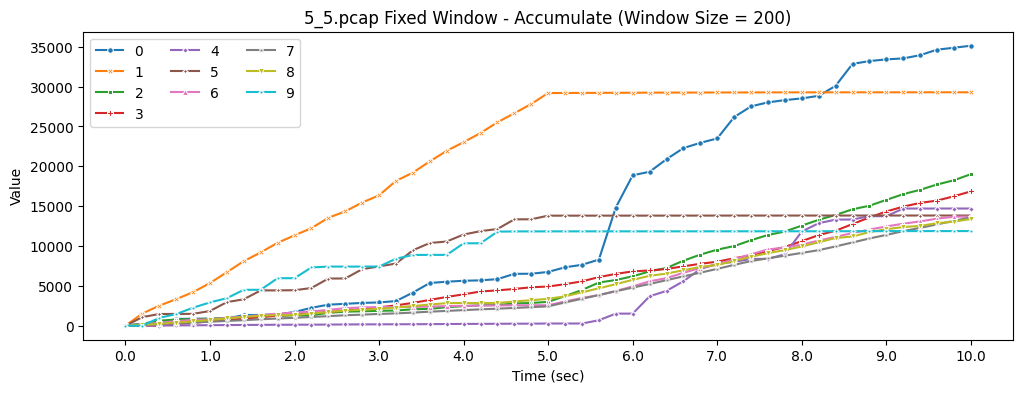

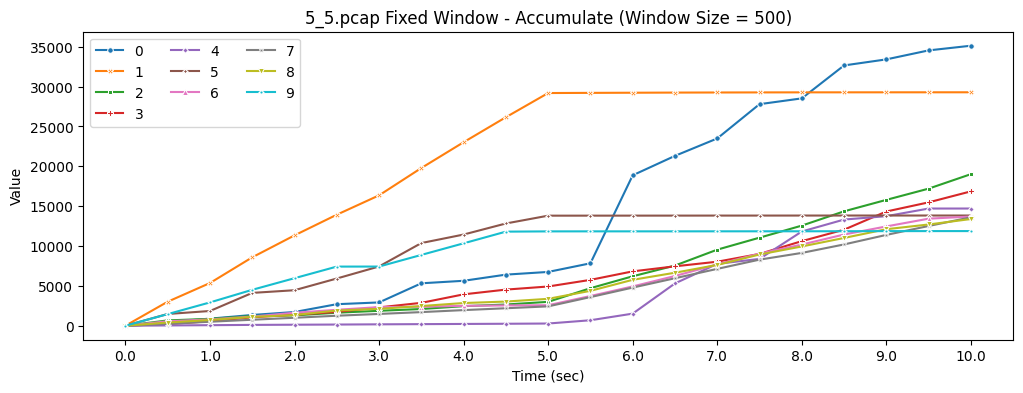

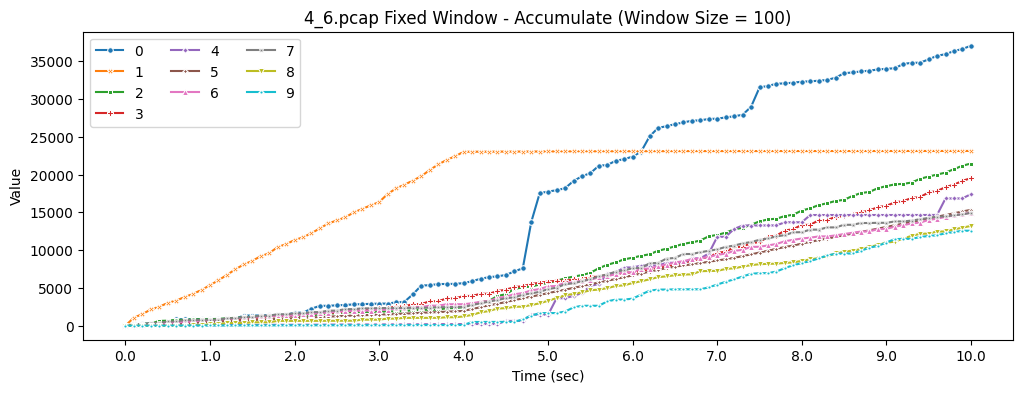

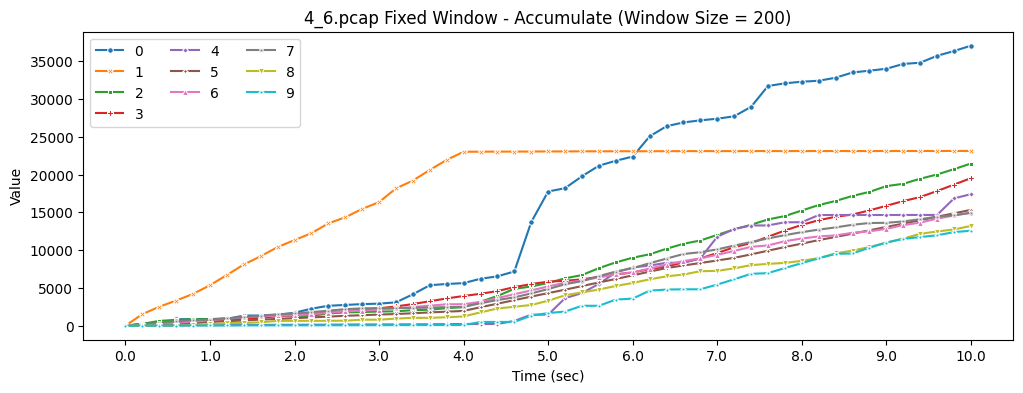

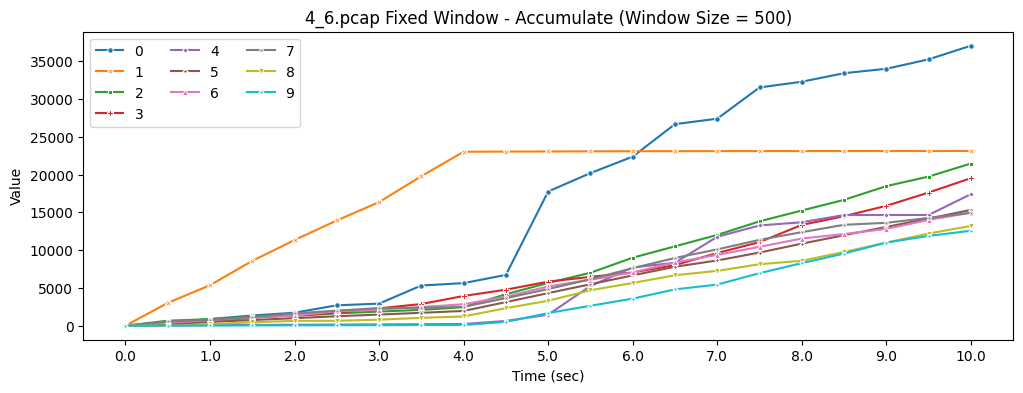

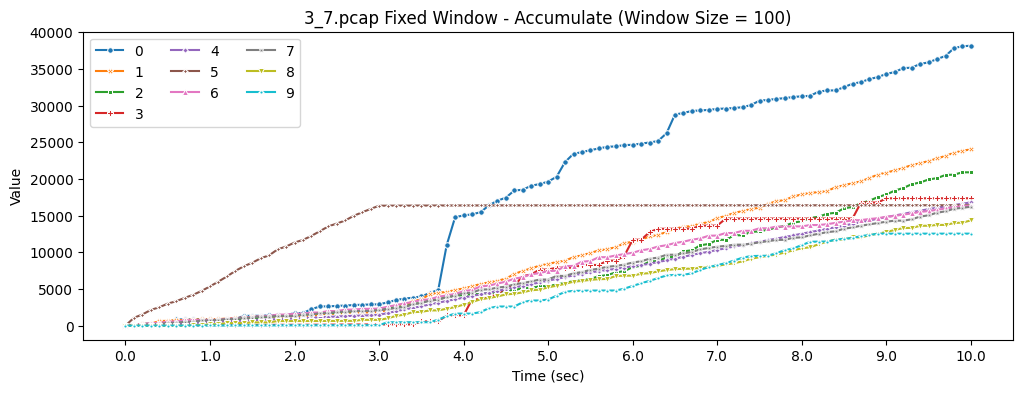

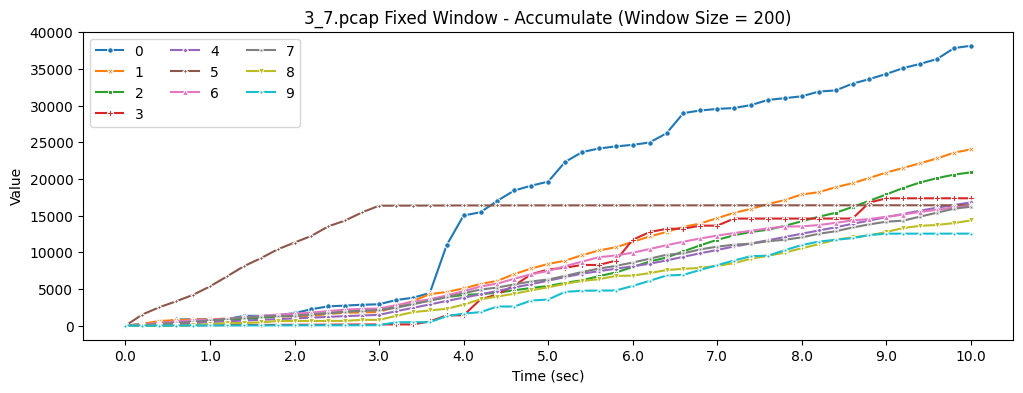

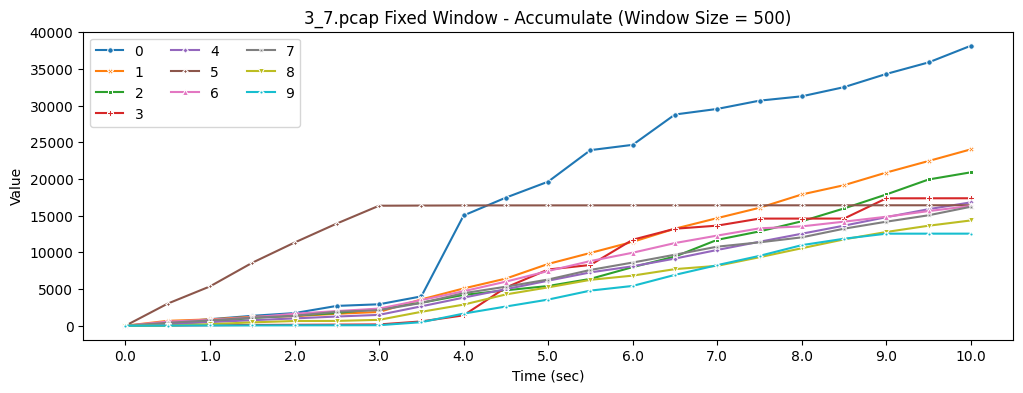

In [31]:
def plot_accumulate(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="accumulate.txt", window_size=100):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)[algo][:10]

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Fixed Window - Accumulate (Window Size = %d)' % (dataset[:-1], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
window_sizes = [100, 200, 500]

for d in datasets:
    for ws in window_sizes:
        plot_accumulate(dataset=d, window_size=ws)

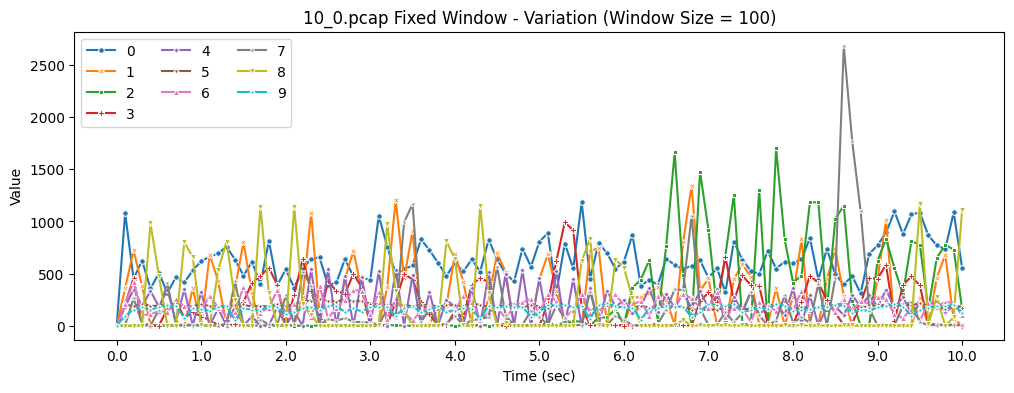

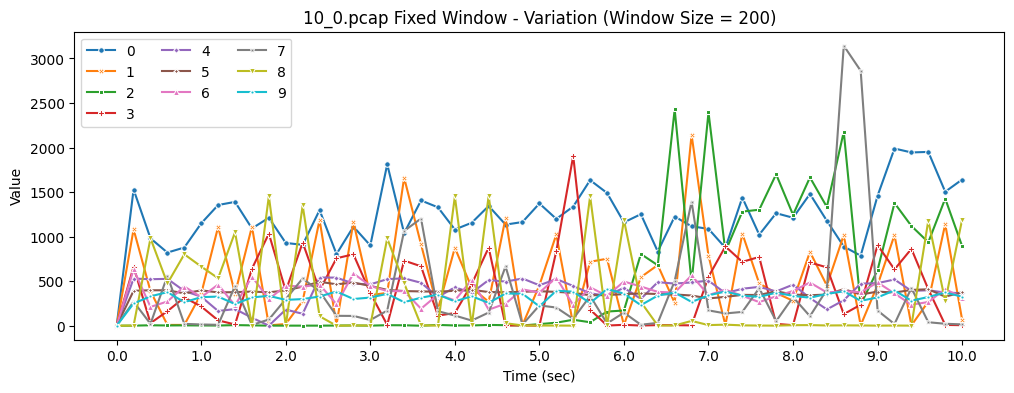

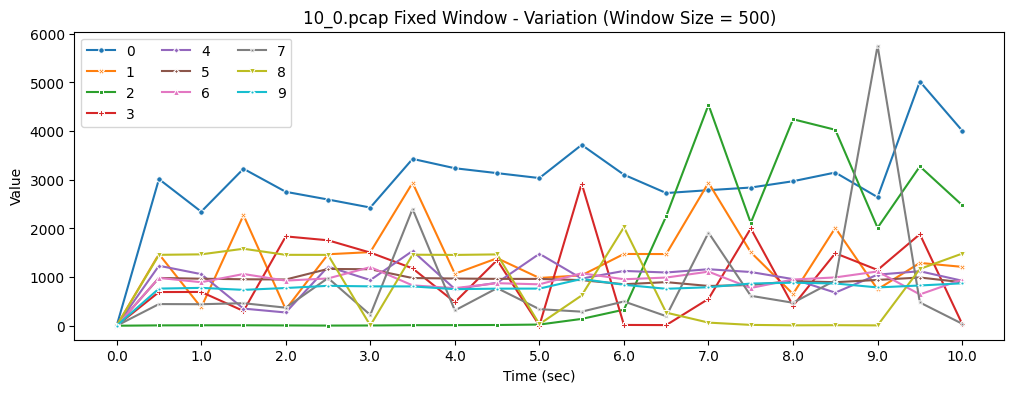

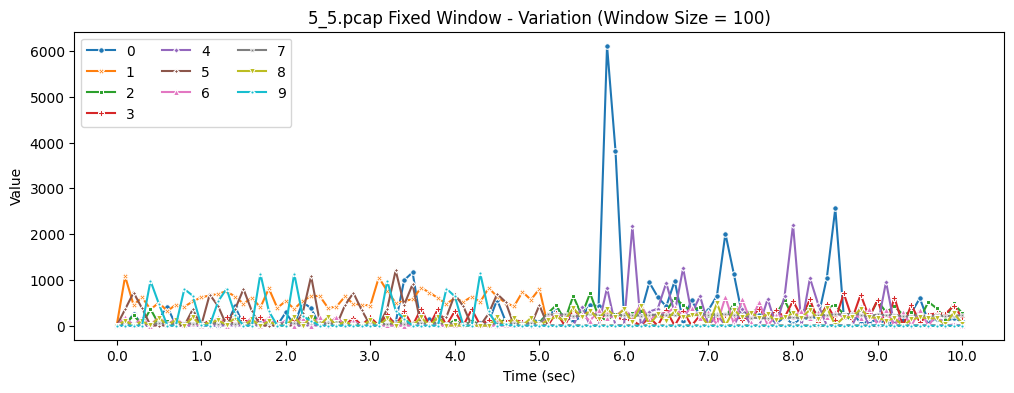

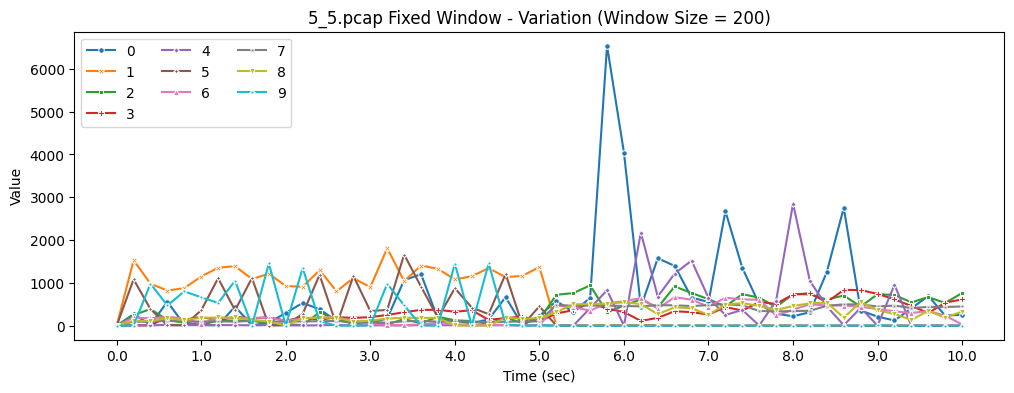

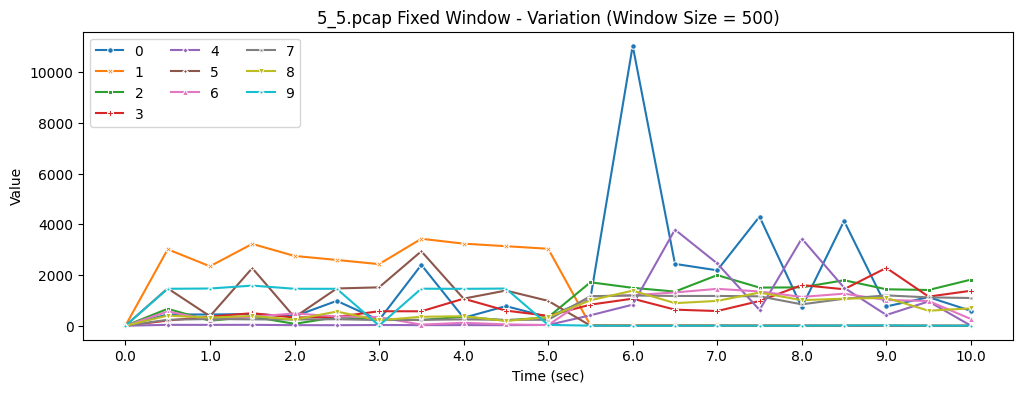

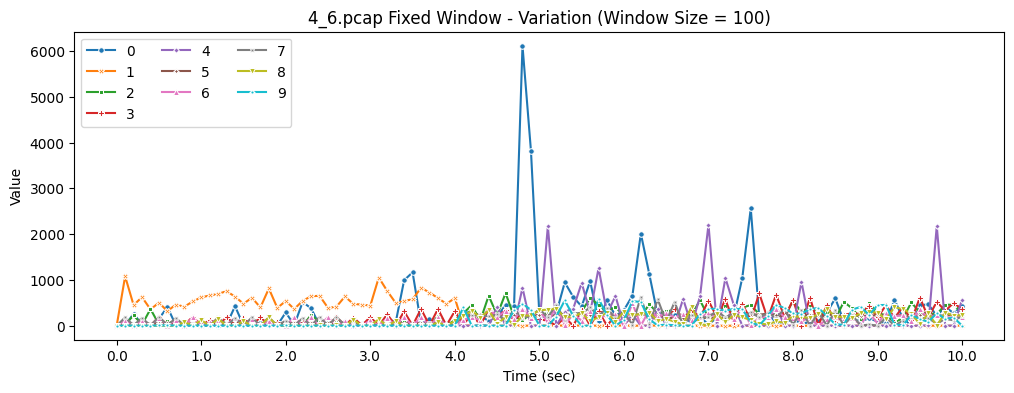

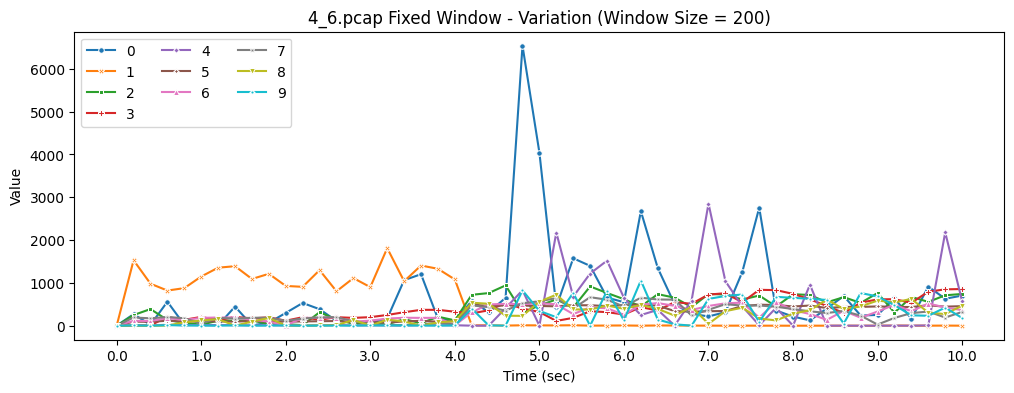

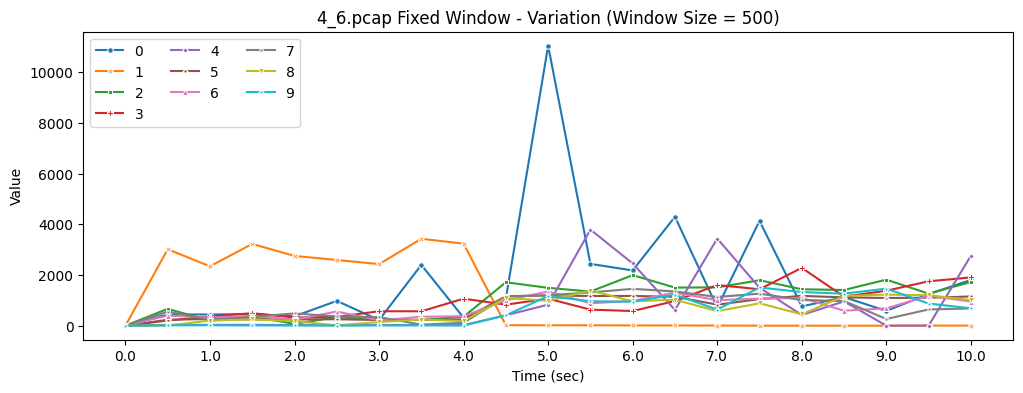

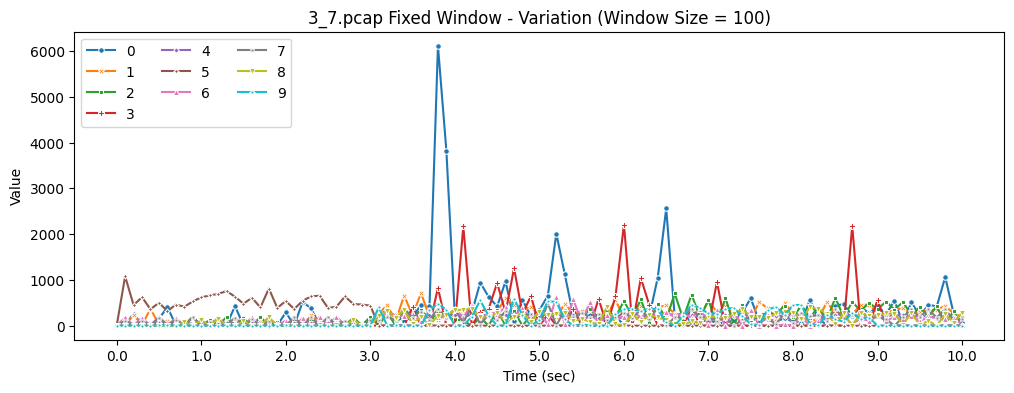

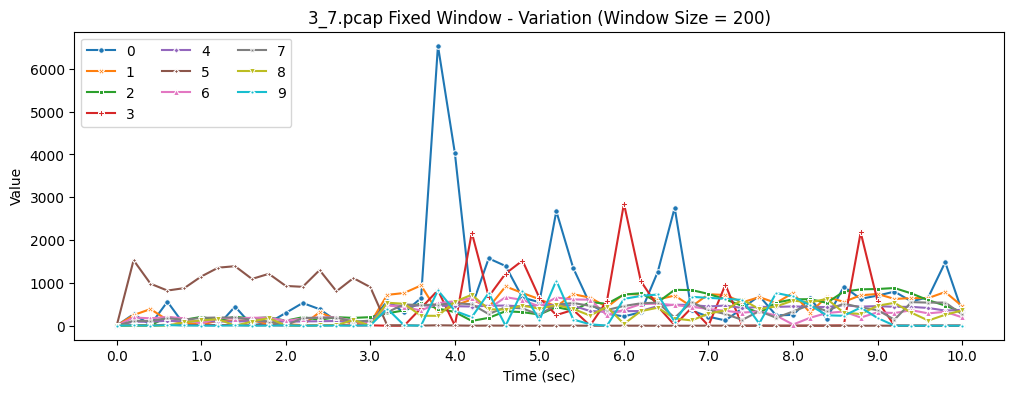

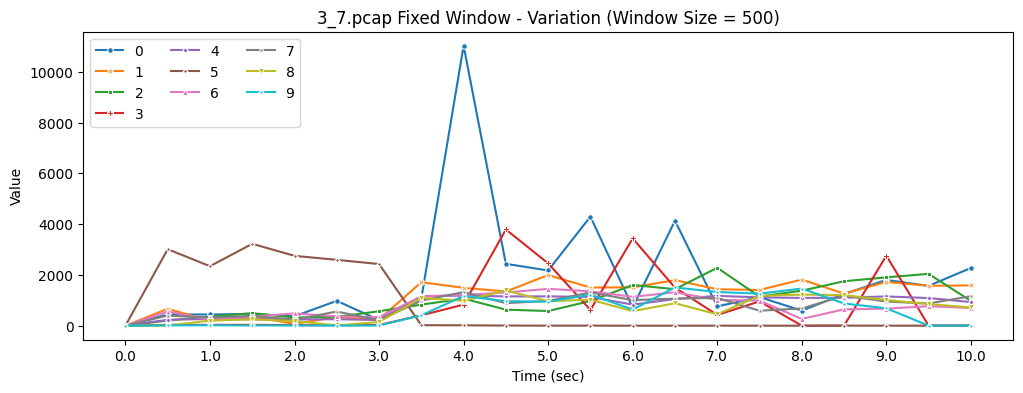

In [32]:
def plot_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="variation.txt", window_size=100):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)[algo][:10]

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Fixed Window - Variation (Window Size = %d)' % (dataset[:-1], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
window_sizes = [100, 200, 500]

for d in datasets:
    for ws in window_sizes:
        plot_variation(dataset=d, window_size=ws)

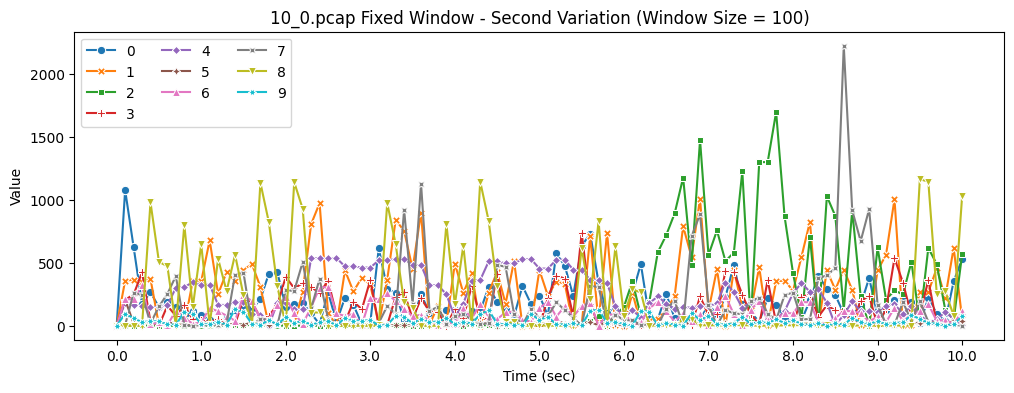

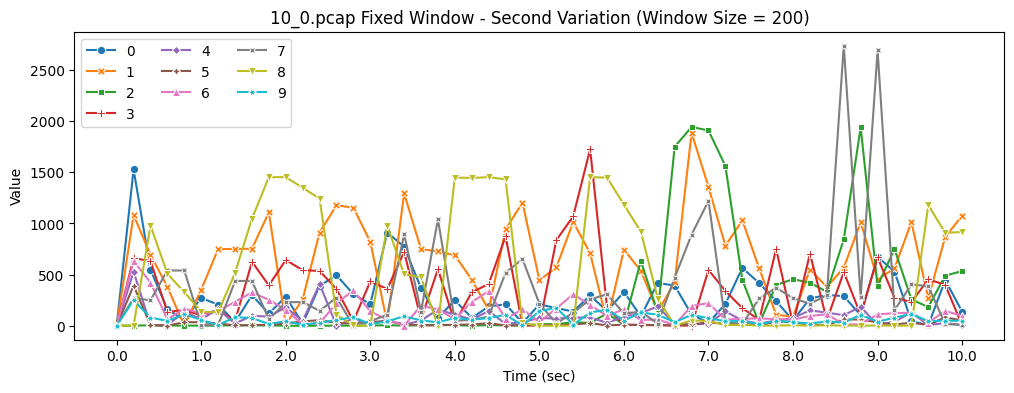

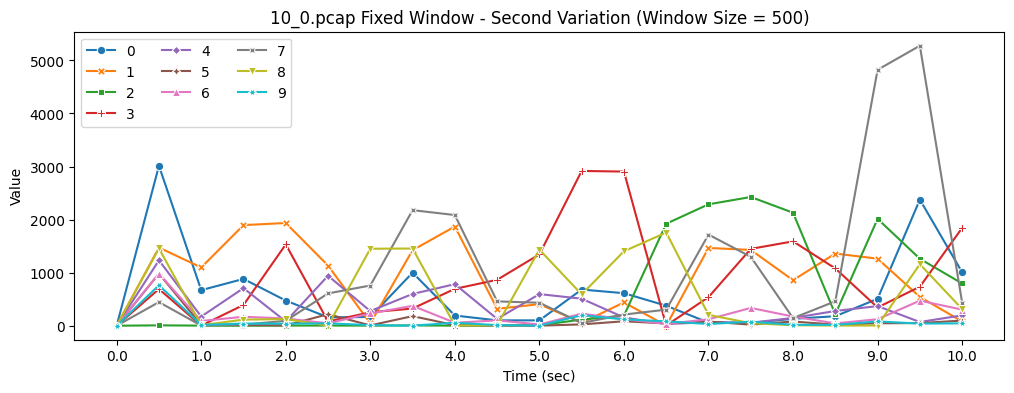

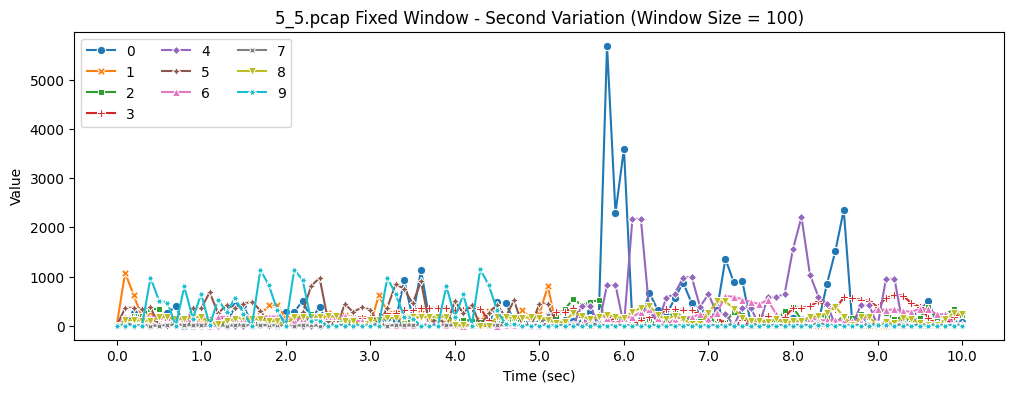

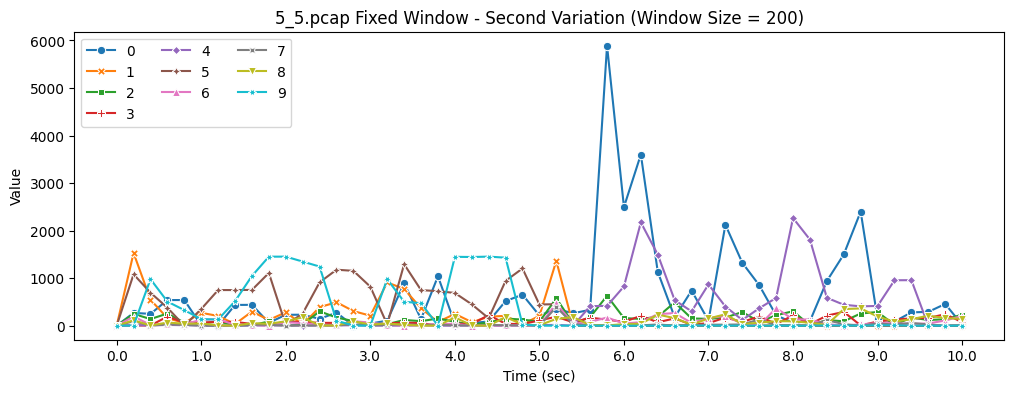

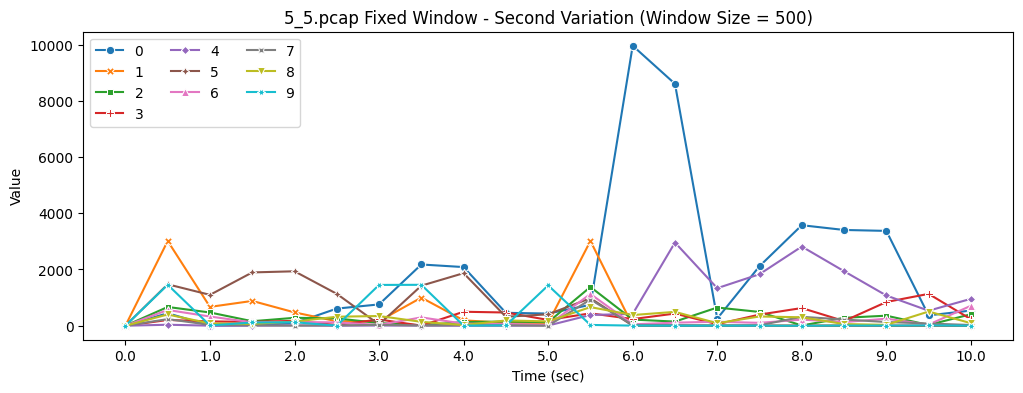

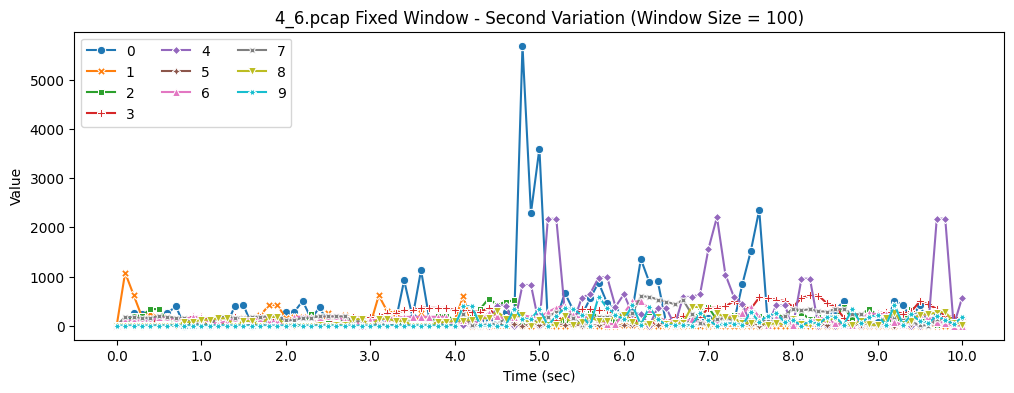

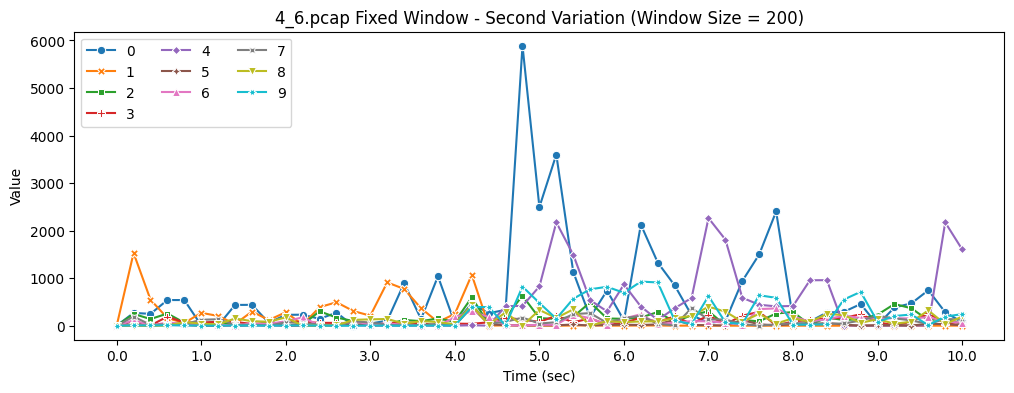

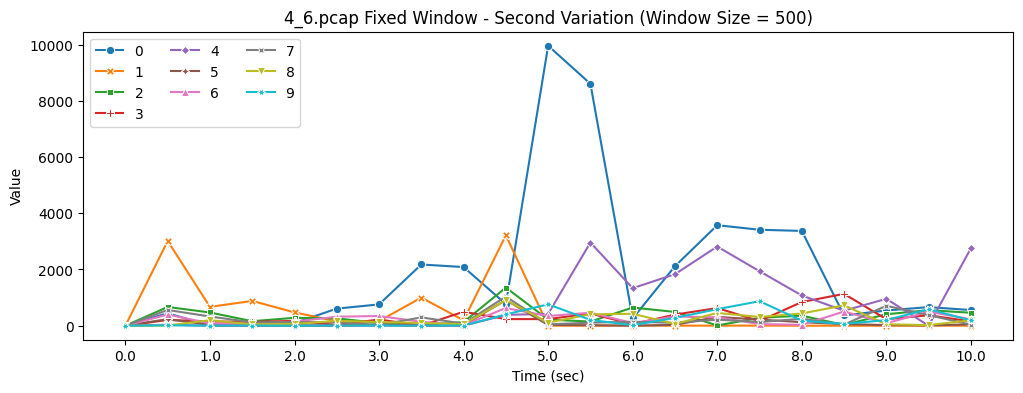

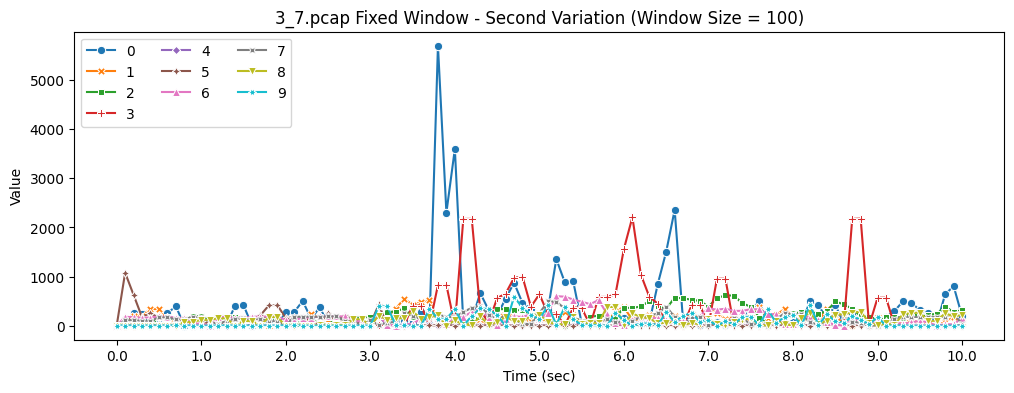

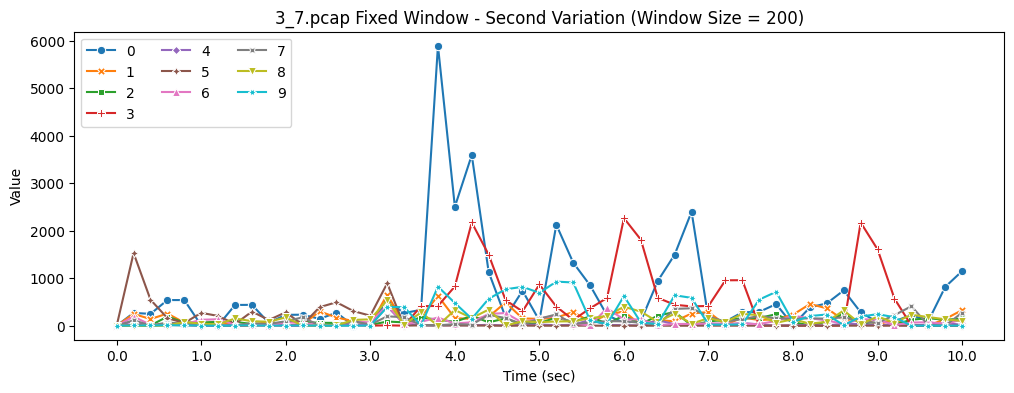

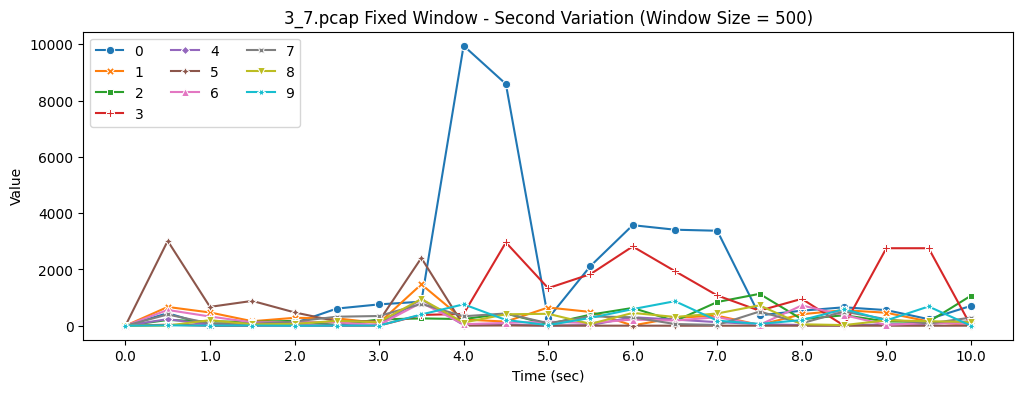

In [33]:
def plot_second_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="second_variation.txt", window_size=100):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)[algo][:10]
    
    # vote = [max(item) for item in res]
    # print(vote)

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

 # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Fixed Window - Second Variation (Window Size = %d)' % (dataset[:-1], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
window_sizes = [100, 200, 500]

for d in datasets:
    for ws in window_sizes:
        plot_second_variation(dataset=d, window_size=ws)